In [58]:
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
# import sys
import matplotlib.colors as colors
from cmocean import cm

In [ ]:
# !conda install --yes --prefix {sys.prefix} scipy

In [9]:
path = '/scratch/usr/shkifmmp/master/data/ORION10/EKE/'
path_mask = '/scratch/usr/shkifmmp/master/data/ORION10/mask/'

In [19]:
mask = xr.open_mfdataset(glob(path_mask + '1_mesh_mask.nc')).tmask.isel(z = 0).squeeze()

In [ ]:
mask

In [29]:
eke_58 = xr.open_mfdataset(glob(path + '1_ORION10*EKE_k10.nc'),
                           chunks={"y":100, "x":100}
                          ).vozocrtx.squeeze().where(mask) #it does not work with open_dataset, dont know why

In [42]:
eke_58 = eke_58.isel(x = slice(1,-1), y = slice(1,-1))

In [31]:
eke_58_1 = xr.open_mfdataset(glob(path + '1_ORION10*EKE_k10.nc')).vozocrtx.squeeze().where(mask)

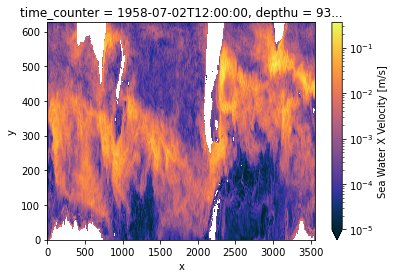

In [59]:
eke_58.plot(norm = colors.LogNorm(vmin=1e-5, vmax = 0.35844943), cmap = cm.thermal)

In [ ]:
eke_58.max(skipna = True).values